In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import acf, pacf

In [17]:
#Load raw player info
players_info = pd.read_csv("../raw_data/data/data/2019-20/players_raw.csv")
#Contains info like the position (which will be pretty important)
#element_type contains the positions 1 = GK 2 = DEF 3 = MID 4 = FWD

#load player id list
players_id_map = pd.read_csv("../raw_data/data/data/2019-20/player_idlist.csv")
players_id_map["name"] = players_id_map.apply(lambda x: x.first_name + "_" + x.second_name + "_" + str(x.id), axis = 1)
players_id_map = pd.merge(players_id_map, players_info[["id","element_type"]], left_on = "id", right_on = "id")
players_id_map.head()

,first_name,second_name,id,name,element_type
0,Shkodran,Mustafi,1,Shkodran_Mustafi_1,2
1,Héctor,Bellerín,2,Héctor_Bellerín_2,2
2,Sead,Kolasinac,3,Sead_Kolasinac_3,2
3,Ainsley,Maitland-Niles,4,Ainsley_Maitland-Niles_4,2
4,Sokratis,Papastathopoulos,5,Sokratis_Papastathopoulos_5,2


In [19]:
#Set path
player_path = "../raw_data/data/data/2019-20/players/{}/gw.csv"
gw_path = "../raw_data/data/data/2019-20/gws/{}.csv" #GWs from 1 to 47

In [104]:

#Explore player consistency across game weeks and also across home/away
all_players = list(players_id_map["name"])

all_players_df_list = [] #list of all players summary df
for name in all_players:
    print(name)
    curr_path = player_path.format(name)
    curr_player_data = pd.read_csv(curr_path)
    curr_player_data = curr_player_data.loc[curr_player_data["minutes"] > 0] #Player has to play here
    if len(curr_player_data) < 20:
        continue #Has played at least 20 matches 
    curr_player_data["yield"] = curr_player_data["total_points"]/curr_player_data["value"] #Adjust player points by cost
    
    #Gather summary stats
    home_data = curr_player_data.loc[curr_player_data["was_home"] == True]
    away_data = curr_player_data.loc[curr_player_data["was_home"] == False]
    yield_mean = curr_player_data["yield"].mean()
    yield_var = curr_player_data["yield"].var()
    home_yield_mean = home_data["yield"].mean()
    home_yield_var = home_data["yield"].var()
    away_yield_mean = away_data["yield"].mean()
    away_yield_var = away_data["yield"].var()
    
    total_points_mean = curr_player_data["total_points"].mean()
    total_points_var = curr_player_data["total_points"].var()
    home_points_mean = home_data["total_points"].mean()
    home_points_var = home_data["total_points"].var()
    away_points_mean = away_data["total_points"].mean()
    away_points_var = away_data["total_points"].var()
    
    #Get momentum stats as well
    points_corr_coef = acf(curr_player_data["total_points"], nlags = 1)[1]
    points_acf_p_val = acf(curr_player_data["total_points"],qstat = True, nlags = 1)[-1][0]
    
    player_summary = {"yield_mean": [yield_mean], "yield_var": [yield_var], "home_yield_mean": [home_yield_mean],
                     "home_yield_var": [home_yield_mean], "away_yield_mean": [away_yield_mean], 
                     "away_yield_var": [away_yield_var], "points_coef": [points_corr_coef], "points_p_val": [points_acf_p_val],
                     "points_mean": [total_points_mean], "points_var": [total_points_var],
                     "home_points_mean": [home_points_mean], "home_points_var": [home_points_var],
                     "away_points_mean": [away_points_mean], "away_points_var": [away_points_var]}
    curr_player_df = pd.DataFrame(player_summary)
    curr_player_df.index = [name]
    all_players_df_list.append(curr_player_df)

all_players_df = pd.concat(all_players_df_list)
    
    

Shkodran_Mustafi_1
Héctor_Bellerín_2
Sead_Kolasinac_3
Ainsley_Maitland-Niles_4
Sokratis_Papastathopoulos_5
Nacho_Monreal_6
Laurent_Koscielny_7
Konstantinos_Mavropanos_8
Carl_Jenkinson_9
Rob_Holding_10
Pierre-Emerick_Aubameyang_11
Alexandre_Lacazette_12
Edward_Nketiah_13
Bernd_Leno_14
Mesut_Özil_15
Henrikh_Mkhitaryan_16
Granit_Xhaka_18
Lucas_Torreira_19
Mohamed_Elneny_20
Matteo_Guendouzi_21
David_Luiz Moreira Marinho_106
Emiliano_Martínez_427
Calum_Chambers_467
Daniel_Ceballos Fernández_469
Cédric_Soares_486
Nicolas_Pépé_488
Reiss_Nelson_489
Joseph_Willock_490
Gabriel Teodoro_Martinelli Silva_504
Kieran_Tierney_515
Bukayo_Saka_541
Emile_Smith Rowe_576
Tyreece_John-Jules_585
Pablo_Marí_617
Zech_Medley_636
Matt_Macey_646
Matthew_Smith_647
Ahmed_El Mohamady_22
James_Chester_23
Neil_Taylor_24
Kortney_Hause_25
Jonathan_Kodjia_26
Ørjan_Nyland_27
Conor_Hourihane_28
Jack_Grealish_29
Anwar_El Ghazi_30
John_McGinn_31
Andre_Green_32
Birkir_Bjarnason_33
Keinan_Davis_34
Henri_Lansbury_35
José Ignaci

Christoph_Zimmermann_275
Jamal_Lewis_276
Grant_Hanley_277
Teemu_Pukki_278
Dennis_Srbeny_279
Tim_Krul_280
Michael_McGovern_281
Mario_Vrancic_282
Emiliano_Buendía_283
Onel_Hernández_284
Marco_Stiepermann_285
Kenny_McLean_286
Todd_Cantwell_287
Moritz_Leitner_288
Alexander_Tettey_289
Tom_Trybull_290
Josip_Drmic_434
Patrick_Roberts_435
Ralf_Fahrmann_449
Sam_Byram_454
Philip_Heise_484
Ibrahim_Amadou_507
Adam_Idah_538
Archie_Mair_551
Akin_Famewo_552
Ondrej_Duda_601
Lukas_Rupp_602
Josh_Martin_632
Jordan_Thomas_650
Daniel_Adshead_669
Lys_Mousset_70
Enda_Stevens_291
Kieron_Freeman_292
Jack_O'Connell_293
George_Baldock_294
John_Egan_295
Richard_Stearman_296
John_Lundstram_297
Billy_Sharp_298
Jake_Eastwood_299
Mark_Duffy_300
John_Fleck_301
Oliver_Norwood_302
David_McGoldrick_303
Chris_Basham_423
Simon_Moore_436
Luke_Freeman_441
Phil_Jagielka_444
Callum_Robinson_453
Ravel_Morrison_456
Dean_Henderson_471
Ben_Osborn_472
Oliver_McBurnie_501
Michael_Verrips_521
Muhamed_Bešić_522
Leon_Clarke_547
Jack_Ro

In [105]:
all_players_df = pd.merge(all_players_df, players_id_map[["name", "element_type"]], left_index = True, right_on = "name")
all_players_df.head()

,yield_mean,yield_var,home_yield_mean,home_yield_var,away_yield_mean,away_yield_var,points_coef,points_p_val,points_mean,points_var,home_points_mean,home_points_var,away_points_mean,away_points_var,name,element_type
2,0.040105,0.001371,0.040522,0.040522,0.039618,0.001107,0.025459,0.890728,2.115385,3.786154,2.142857,4.747253,2.083333,2.992424,Sead_Kolasinac_3,2
3,0.043169,0.003896,0.026310,0.026310,0.060027,0.005440,-0.120718,0.561289,2.050000,9.418421,1.200000,4.844444,2.900000,13.433333,Ainsley_Maitland-Niles_4,2
10,0.052060,0.001692,0.058913,0.058913,0.045206,0.001422,-0.175951,0.271322,5.694444,20.218254,6.444444,23.437908,4.944444,16.996732,Pierre-Emerick_Aubameyang_11,4
11,0.042305,0.001193,0.058001,0.058001,0.026610,0.000539,-0.196076,0.259263,3.933333,10.271264,5.400000,12.114286,2.466667,4.552381,Alexandre_Lacazette_12,4
13,0.076000,0.002825,0.085333,0.085333,0.066667,0.001581,-0.167187,0.336088,3.800000,7.062069,4.266667,10.209524,3.333333,3.952381,Bernd_Leno_14,1


In [106]:
#1 = GK 2 = DEF 3 = MID 4 = FWD
positions_dict = {}
player_stats_group = all_players_df.groupby(by = "element_type")
for position, position_summary in player_stats_group:
    position_summary.loc[:, "var_adjusted_points"] =( position_summary["points_mean"] - position_summary["points_mean"].mean())/(position_summary["points_var"]**0.5)
    positions_dict[position] = position_summary
    
    

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [114]:
#GK
gk_summary = positions_dict[1]
gk_summary = gk_summary.sort_values("var_adjusted_points", ascending = False)
gk_summary[["name", "var_adjusted_points", "points_coef", "points_p_val", "yield_mean"]].head()

,name,var_adjusted_points,points_coef,points_p_val,yield_mean
538,Hugo_Lloris_340,0.263992,-0.304553,0.134483,0.087299
480,Dean_Henderson_471,0.227722,0.060156,0.706851,0.091590
145,Nick_Pope_93,0.214183,0.101247,0.516377,0.094580
303,Alisson_Ramses Becker_189,0.141604,0.178282,0.312399,0.069265
272,Kasper_Schmeichel_168,0.126589,-0.093612,0.548507,0.078140


In [115]:
#DEF
def_summary = positions_dict[2]
def_summary = def_summary.sort_values("var_adjusted_points", ascending = False)
def_summary[["name", "var_adjusted_points", "points_coef", "points_p_val", "yield_mean"]].head()

,name,var_adjusted_points,points_coef,points_p_val,yield_mean
295,Andrew_Robertson_181,0.706051,-0.138809,0.385497,0.072074
296,Trent_Alexander-Arnold_182,0.527451,-0.041094,0.792248,0.074657
638,Willy_Boly_405,0.518488,-0.180475,0.365493,0.090796
297,Virgil_van Dijk_183,0.439406,-0.143510,0.357666,0.072547
635,Matt_Doherty_401,0.418146,0.029016,0.856049,0.075409


In [116]:
def_summary[["name", "var_adjusted_points", "points_coef", "points_p_val", "yield_mean"]].tail()

,name,var_adjusted_points,points_coef,points_p_val,yield_mean
409,Danny_Rose_332,-0.492081,0.312346,0.110304,0.038153
429,Maximillian_Aarons_274,-0.493855,-0.068519,0.668383,0.042226
567,Adrian_Mariappa_356,-0.699164,0.099911,0.630660,0.031033
172,Andreas_Christensen_108,-0.743209,-0.082215,0.686193,0.033129
428,Ben_Godfrey_273,-1.116094,-0.096438,0.578991,0.028620


In [123]:
#MID
mid_summary = positions_dict[3]
mid_summary = mid_summary.sort_values("var_adjusted_points", ascending = False)
mid_summary[["name", "var_adjusted_points", "points_coef", "points_p_val", "yield_mean"]].head(5)

,name,var_adjusted_points,points_coef,points_p_val,yield_mean
305,Mohamed_Salah_191,0.805814,-0.119528,0.466644,0.054963
306,Sadio_Mané_192,0.792842,-0.371580,0.021835,0.052472
338,Kevin_De Bruyne_215,0.792109,-0.407973,0.011808,0.069719
372,Anthony_Martial_239,0.722756,-0.273254,0.105485,0.078914
540,Heung-Min_Son_342,0.631700,0.060624,0.727237,0.058040


In [124]:
mid_summary[["name", "var_adjusted_points", "points_coef", "points_p_val", "yield_mean"]].tail()

,name,var_adjusted_points,points_coef,points_p_val,yield_mean
377,Frederico_Rodrigues de Paula Santos_244,-1.625404,0.309483,0.079494,0.032569
545,Harry_Winks_347,-1.692204,0.045359,0.791108,0.031767
64,Marvelous_Nakamba_491,-1.873416,-0.067327,0.702834,0.033699
440,Marco_Stiepermann_285,-2.181898,-0.215686,0.261250,0.025325
217,James_McCarthy_157,-2.290261,0.047284,0.776354,0.028643


In [125]:
#FWD
fwd_summary = positions_dict[4]
fwd_summary = fwd_summary.sort_values("var_adjusted_points", ascending = False)
fwd_summary[["name", "var_adjusted_points", "points_coef", "points_p_val", "yield_mean"]].head(5)

,name,var_adjusted_points,points_coef,points_p_val,yield_mean
366,Marcus_Rashford_233,0.582611,-0.168373,0.325499,0.065186
270,Jamie_Vardy_166,0.528548,0.100939,0.533316,0.063422
642,Raúl_Jiménez_409,0.527605,0.073449,0.637806,0.067072
10,Pierre-Emerick_Aubameyang_11,0.520473,-0.175951,0.271322,0.052060
536,Harry_Kane_338,0.502042,-0.009543,0.956875,0.049795


In [120]:
fwd_summary[["name", "var_adjusted_points", "points_coef", "points_p_val", "yield_mean"]].tail()

,name,var_adjusted_points,points_coef,points_p_val,yield_mean
410,Joelinton Cássio_Apolinário de Lira_466,-0.897012,-0.130441,0.403124,0.036246
205,Christian_Benteke_129,-0.929532,-0.026460,0.890382,0.030457
575,Andre_Gray_364,-0.951289,-0.058602,0.764484,0.029517
109,Glenn_Murray_44,-1.491435,-0.003225,0.986845,0.028188
446,Josip_Drmic_434,-1.794509,-0.142449,0.483906,0.023145


In [142]:
test_df = pd.read_csv("../raw_data/data/data/2019-20/players/Harry_Kane_338/gw.csv")
test_mod_df = test_df.loc[test_df["minutes"] > 0]

In [143]:
test_mod_df

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,0,3,50,0,24.1,338,6,1,2,18.3,...,1,3,95.0,13,0,0,0,110,True,0
1,0,0,4,0,1.8,338,16,2,0,0.6,...,2,2,4.0,2,-42147,115756,157903,110,False,0
2,0,0,0,0,2.8,338,28,1,0,1.0,...,1,0,8.0,2,219781,329010,109229,110,True,0
3,0,0,23,0,11.8,338,31,2,1,9.1,...,2,2,38.0,6,-397988,38741,436729,111,False,0
4,1,0,22,1,18.0,338,48,0,0,4.6,...,0,4,5.0,5,-143485,58747,202232,110,True,0
5,0,2,28,0,2.9,338,56,2,1,13.9,...,1,2,86.0,8,-185553,13726,199279,110,False,0
6,0,2,30,0,1.3,338,69,1,1,7.0,...,1,2,31.0,8,-4040,76232,80272,110,True,0
7,0,0,6,0,28.8,338,72,3,0,4.5,...,0,3,12.0,2,-28232,40325,68557,110,False,0
8,0,0,2,0,2.8,338,89,1,0,5.1,...,1,1,44.0,2,-73103,45430,118533,109,True,0
9,0,1,26,0,10.8,338,94,2,1,6.5,...,1,2,19.0,7,-166271,8722,174993,109,False,0


In [144]:
test_df.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards'],
      dtype='object')

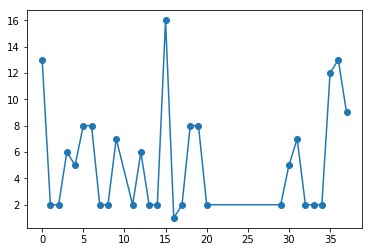

In [145]:
plt.plot(test_mod_df.index, test_mod_df["total_points"], marker = "o")

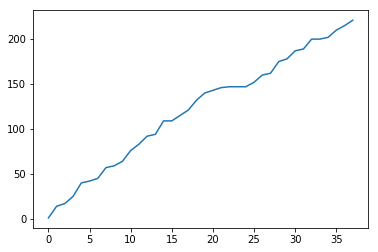

In [139]:
plt.plot(test_df.index, test_df["total_points"].cumsum())